In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'C:/Users/Augus/Desktop/ca_ev_registration_population work.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   year state               county  \
0  2010    CA       Alameda County   
1  2010    CA        Amador County   
2  2010    CA  Contra Costa County   
3  2010    CA        Fresno County   
4  2010    CA      Humboldt County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...   1512986.0   
1  [95601, 95629, 95640, 95642, 95654, 95665, 956...     37886.0   
2  [94505, 94506, 94507, 94509, 94511, 94513, 945...   1052540.0   
3  [93210, 93234, 93242, 93602, 93605, 93606, 936...    932039.0   
4  [95501, 95502, 95503, 95511, 95514, 95518, 955...    135009.0   

   ev_registrations adopton rate  
0                20        0.00%  
1                 1        0.00%  
2                10        0.00%  
3                 2        0.00%  
4                 2        0.00%  


In [2]:
# Convert 'adopton rate' column to numeric by stripping the '%' sign and converting to float
df['adopton rate'] = df['adopton rate'].str.rstrip('%').astype('float') / 100

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)

Missing values in each column:
 year                 0
state                0
county              11
zip_codes           11
population          11
ev_registrations     0
adopton rate        11
dtype: int64

Data types of each column:
 year                  int64
state                object
county               object
zip_codes            object
population          float64
ev_registrations      int64
adopton rate        float64
dtype: object


In [3]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Data after removing missing values:")
print(df_cleaned.head())

# Check for any remaining missing values
print("\nRemaining missing values in each column:\n", df_cleaned.isnull().sum())


Data after removing missing values:
   year state               county  \
0  2010    CA       Alameda County   
1  2010    CA        Amador County   
2  2010    CA  Contra Costa County   
3  2010    CA        Fresno County   
4  2010    CA      Humboldt County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...   1512986.0   
1  [95601, 95629, 95640, 95642, 95654, 95665, 956...     37886.0   
2  [94505, 94506, 94507, 94509, 94511, 94513, 945...   1052540.0   
3  [93210, 93234, 93242, 93602, 93605, 93606, 936...    932039.0   
4  [95501, 95502, 95503, 95511, 95514, 95518, 955...    135009.0   

   ev_registrations  adopton rate  
0                20           0.0  
1                 1           0.0  
2                10           0.0  
3                 2           0.0  
4                 2           0.0  

Remaining missing values in each column:
 year                0
state               0
county              0
z

In [4]:
# Group by year to calculate total EV registrations per year
total_ev_registrations_per_year = df_cleaned.groupby('year')['ev_registrations'].sum().reset_index()

# Display the total EV registrations per year
print("Total EV Registrations Per Year:")
print(total_ev_registrations_per_year)

Total EV Registrations Per Year:
    year  ev_registrations
0   2010               743
1   2011              5662
2   2012             18054
3   2013             51849
4   2014            107983
5   2015            165121
6   2016            229005
7   2017            320644
8   2018            444612
9   2019            555347
10  2020            623919


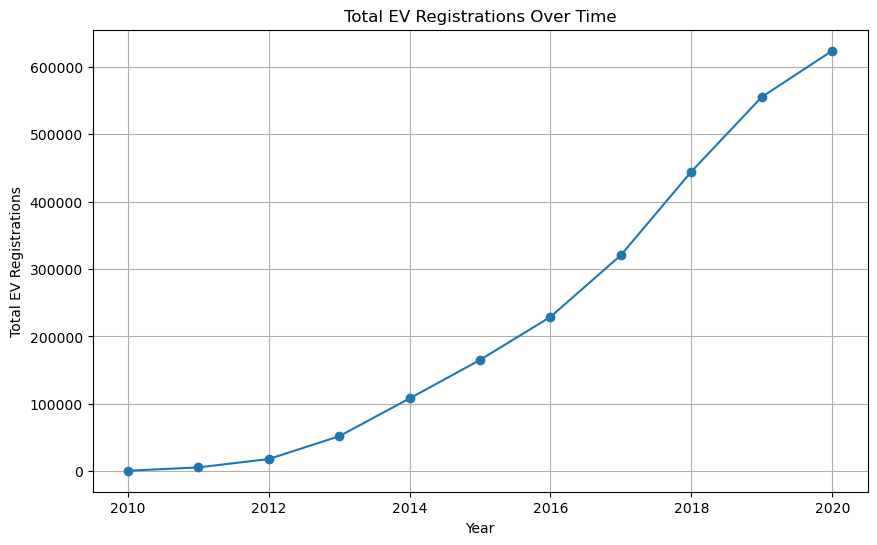

In [5]:
import matplotlib.pyplot as plt

# Plot total EV registrations over time
plt.figure(figsize=(10, 6))
plt.plot(total_ev_registrations_per_year['year'], total_ev_registrations_per_year['ev_registrations'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total EV Registrations')
plt.title('Total EV Registrations Over Time')
plt.grid(True)
plt.show()

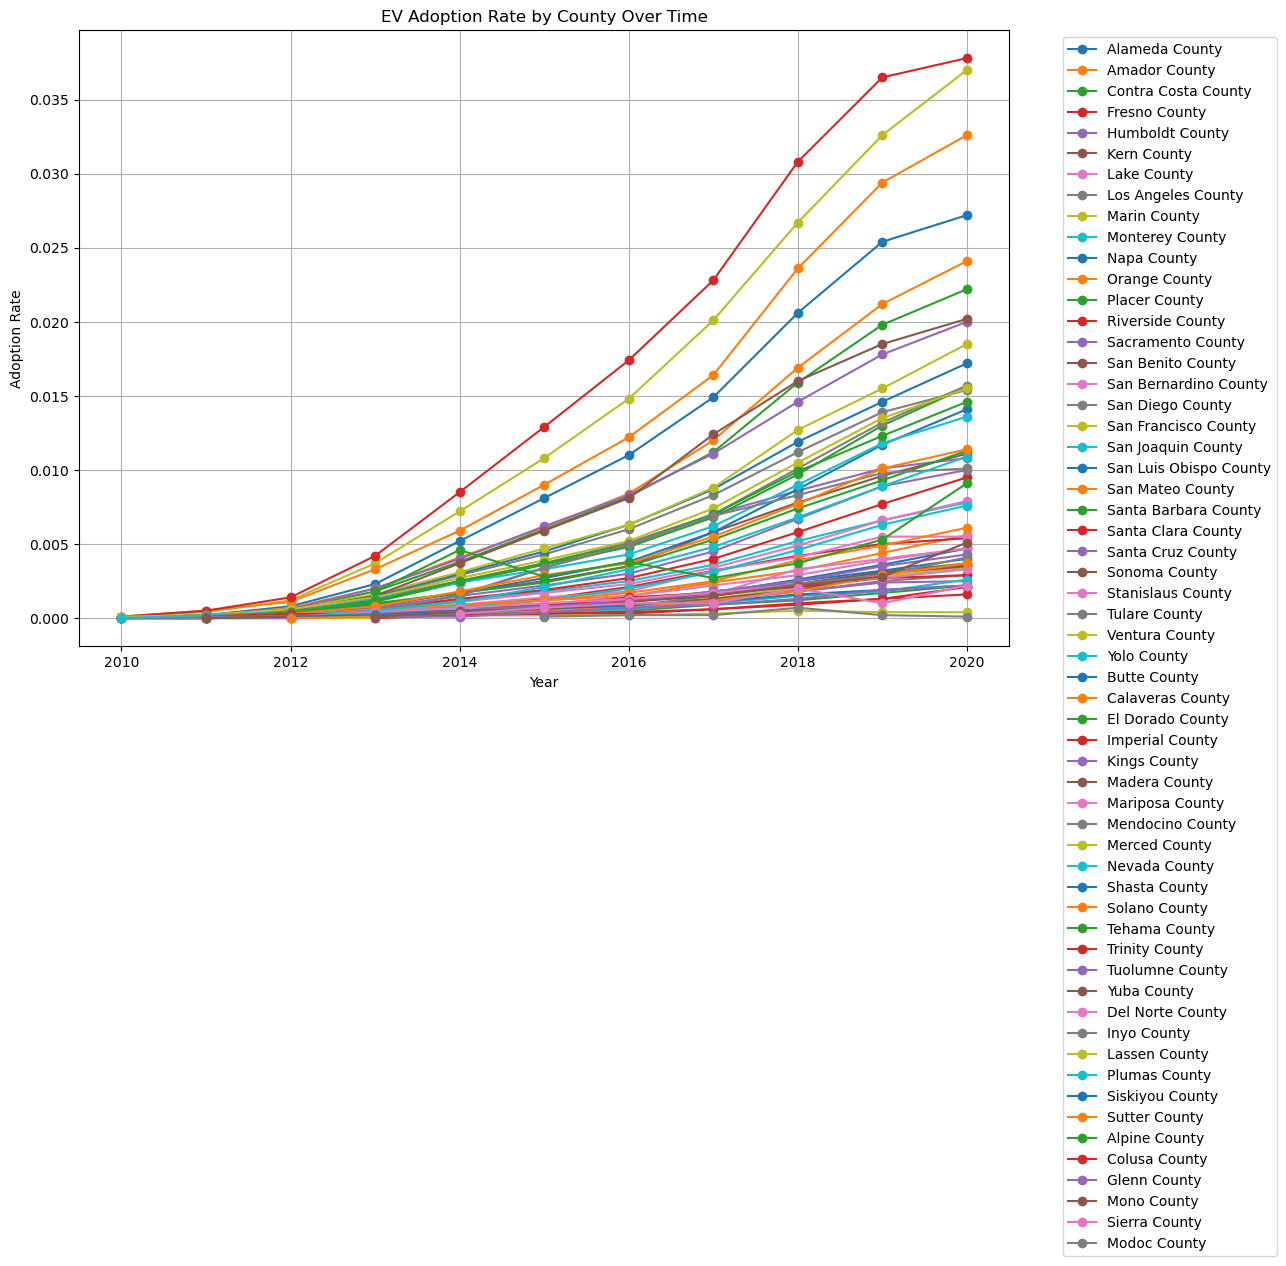

In [6]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Group data by county and year, then calculate the mean adoption rate
counties = df_cleaned['county'].unique()
for county in counties:
    county_data = df_cleaned[df_cleaned['county'] == county]
    plt.plot(county_data['year'], county_data['adopton rate'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.title('EV Adoption Rate by County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend to be outside the plot
plt.grid(True)
plt.show()

In [7]:
# Calculate the standard deviation of the adoption rate for each county
std_dev_by_county = df_cleaned.groupby('county')['adopton rate'].std().reset_index()

# Set a threshold for identifying "sporadic" counties (mean + standard deviation)
std_threshold = std_dev_by_county['adopton rate'].mean() + std_dev_by_county['adopton rate'].std()

# Identify counties with standard deviation above the threshold
sporadic_counties = std_dev_by_county[std_dev_by_county['adopton rate'] > std_threshold]['county'].tolist()

# Print the list of counties with drastic changes
print("Counties with drastic changes in EV adoption rates:")
for county in sporadic_counties:
    print(county)


Counties with drastic changes in EV adoption rates:
Alameda County
Contra Costa County
Marin County
Orange County
San Mateo County
Santa Clara County
Santa Cruz County
Sonoma County


In [8]:
# Define the variables with assumed values
revenue_per_ev = 40000  
production_cost_per_ev = 30000 
fixed_costs = 1000000 

# Initialize a DataFrame to store the profit model results
profit_data = {
    'Year': [],
    'County': [],
    'EVs Sold': [],
    'Revenue ($)': [],
    'Total Costs ($)': [],
    'Profit ($)': []
}

# Calculate profit for each county and year
for _, row in df_cleaned.iterrows():
    year = row['year']
    county = row['county']
    adoption_rate = row['adopton rate']
    population = row['population']
    evs_sold = population * adoption_rate
    revenue = evs_sold * revenue_per_ev
    variable_costs = evs_sold * production_cost_per_ev
    total_costs = fixed_costs + variable_costs
    profit = revenue - total_costs
    
    # Store results in the data dictionary
    profit_data['Year'].append(year)
    profit_data['County'].append(county)
    profit_data['EVs Sold'].append(evs_sold)
    profit_data['Revenue ($)'].append(revenue)
    profit_data['Total Costs ($)'].append(total_costs)
    profit_data['Profit ($)'].append(profit)

# Convert the profit data dictionary to a DataFrame
df_profit = pd.DataFrame(profit_data)

# Display the profit model DataFrame
print("Profit Model:")
print(df_profit.head())

Profit Model:
   Year               County  EVs Sold  Revenue ($)  Total Costs ($)  \
0  2010       Alameda County       0.0          0.0        1000000.0   
1  2010        Amador County       0.0          0.0        1000000.0   
2  2010  Contra Costa County       0.0          0.0        1000000.0   
3  2010        Fresno County       0.0          0.0        1000000.0   
4  2010      Humboldt County       0.0          0.0        1000000.0   

   Profit ($)  
0  -1000000.0  
1  -1000000.0  
2  -1000000.0  
3  -1000000.0  
4  -1000000.0  


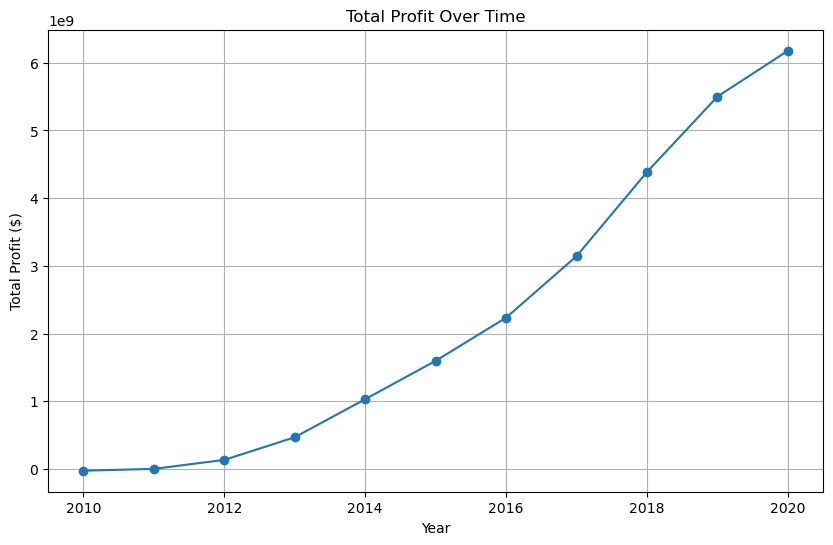

In [9]:
import matplotlib.pyplot as plt

# Calculate total profit per year
total_profit_per_year = df_profit.groupby('Year')['Profit ($)'].sum().reset_index()

# Plot total profit over time
plt.figure(figsize=(10, 6))
plt.plot(total_profit_per_year['Year'], total_profit_per_year['Profit ($)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit Over Time')
plt.grid(True)
plt.show()


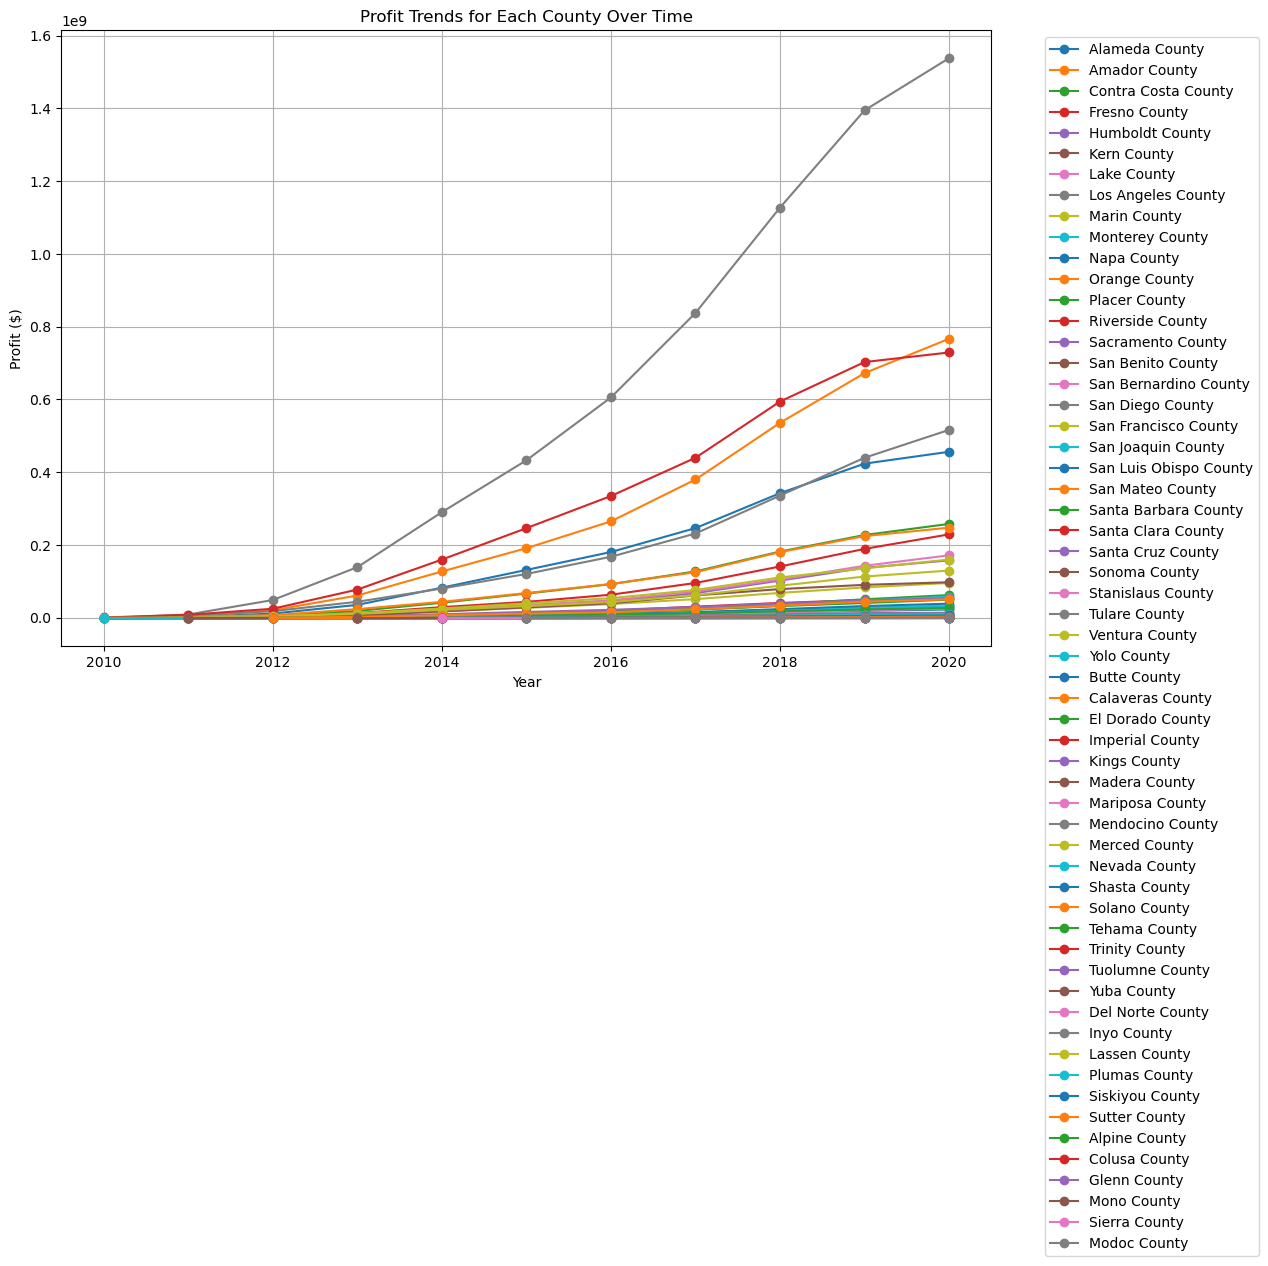

In [10]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Get a list of unique counties
counties = df_profit['County'].unique()

# Plot the profit trend for each county
for county in counties:
    county_data = df_profit[df_profit['County'] == county]
    plt.plot(county_data['Year'], county_data['Profit ($)'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title('Profit Trends for Each County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot for clarity
plt.grid(True)
plt.show()

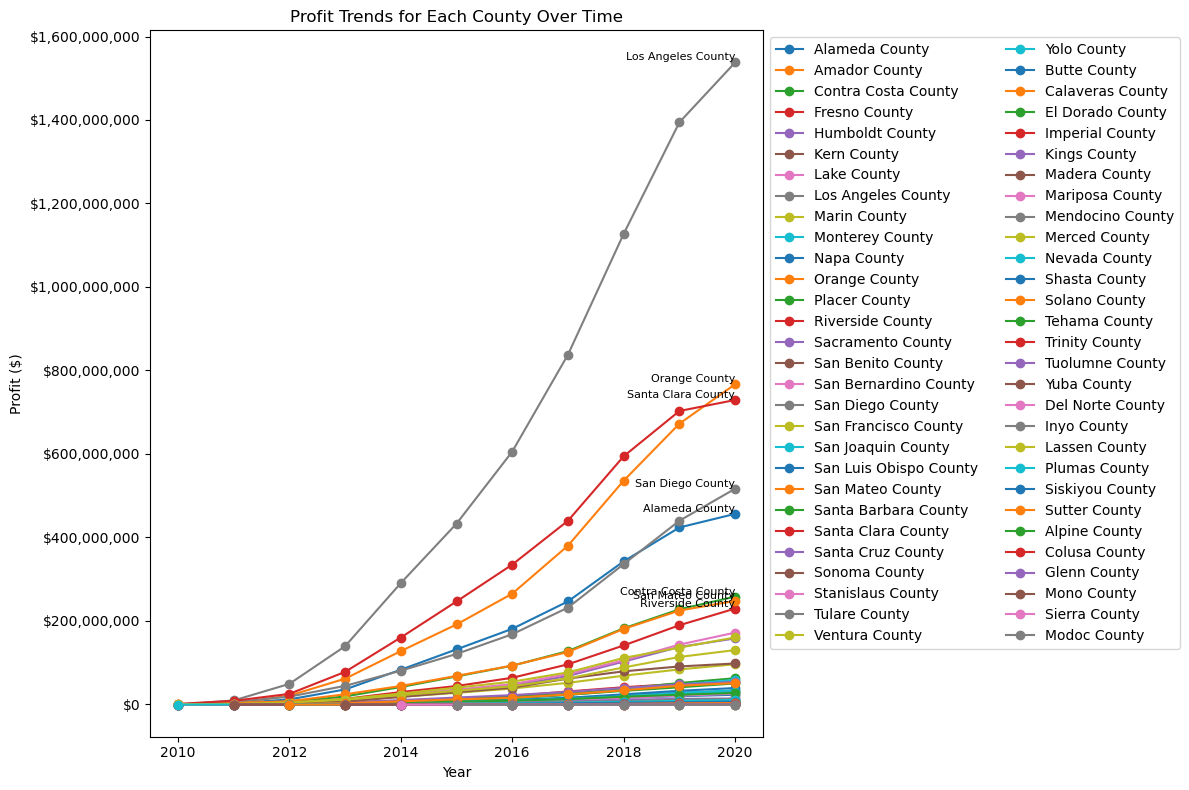

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each county to plot its data
for county in df_profit['County'].unique():
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county, only if the maximum is above -500,000
    max_profit_row = county_data[county_data['Profit ($)'] > 200000000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=8, ha='right', va='bottom')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Each County Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()

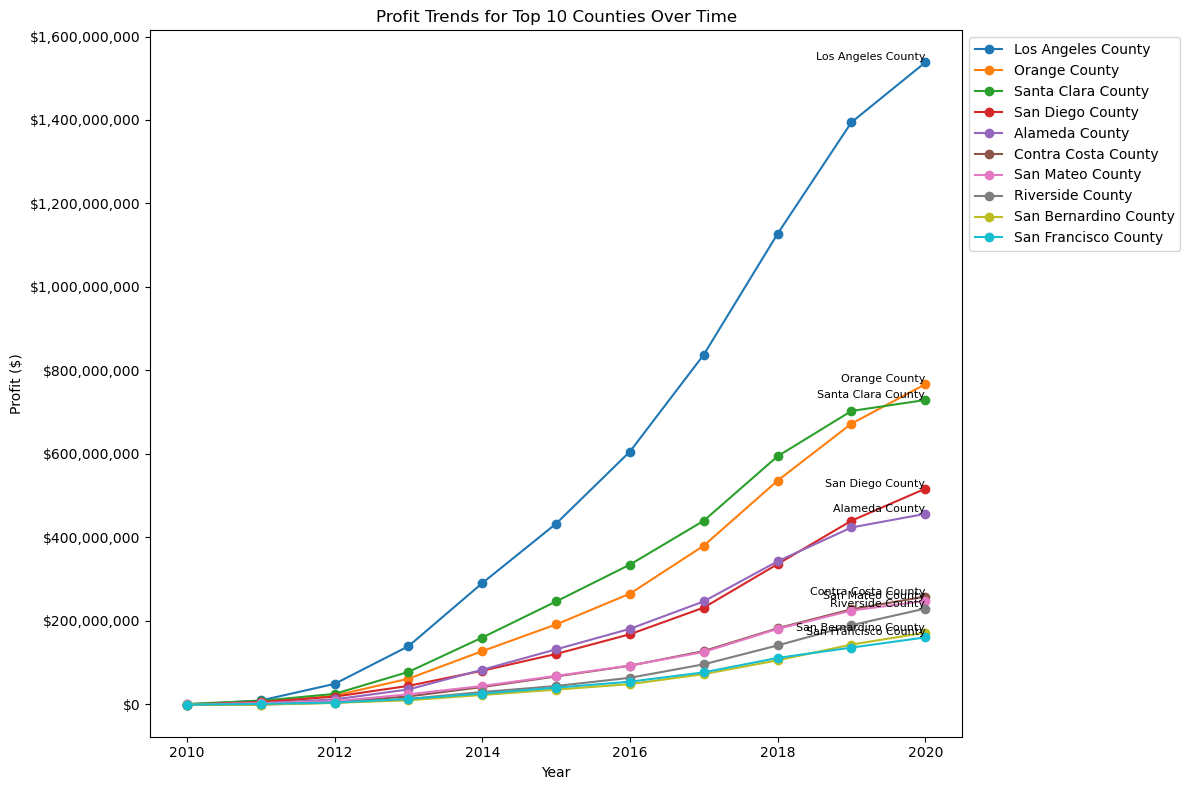

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Identify the top 10 counties based on maximum profit
top_counties = df_profit.groupby('County')['Profit ($)'].max().nlargest(10).index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each of the top counties to plot its data
for county in top_counties:
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county
    max_profit_row = county_data[county_data['Profit ($)'] > -500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=8, ha='right', va='bottom')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.set_title('Profit Trends for Top 10 Counties Over Time')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend to display only the top 10 counties
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()


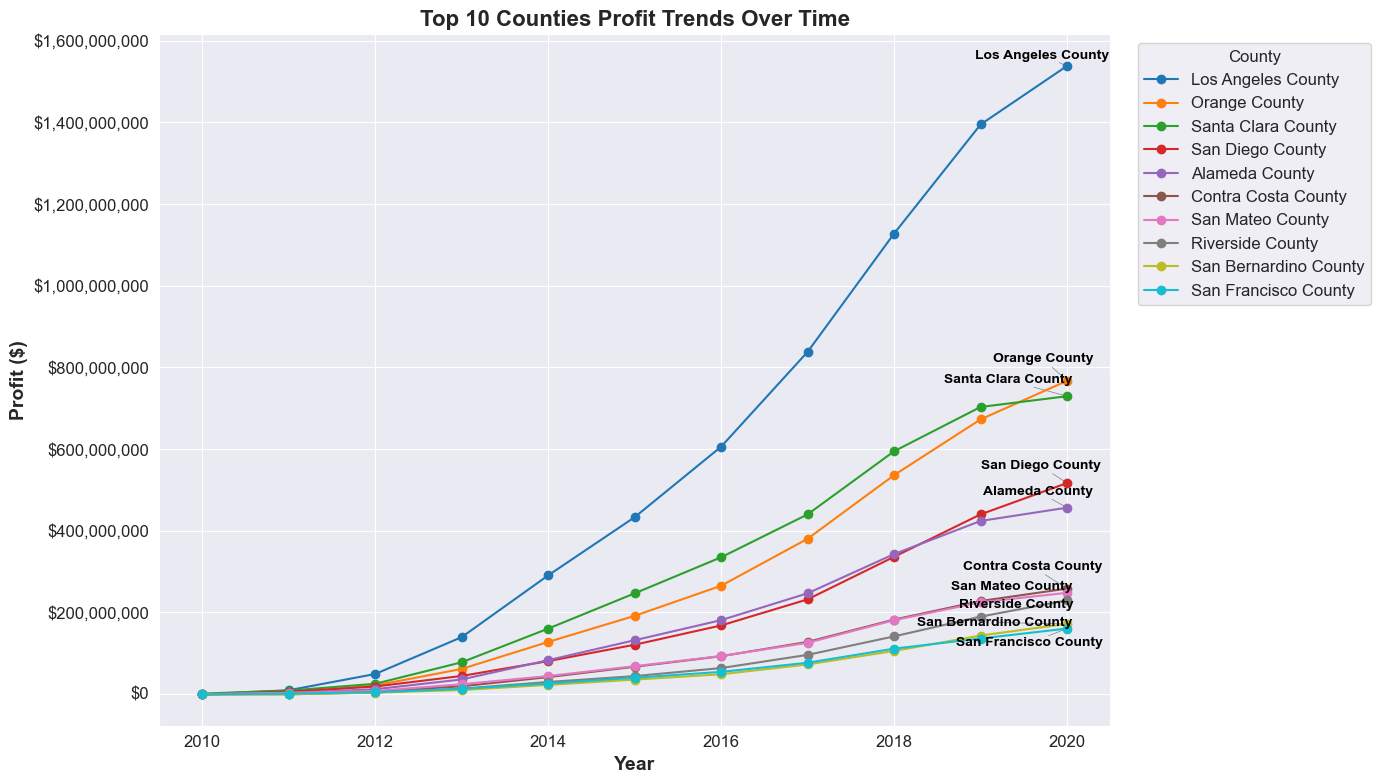

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text

# Set the style to match the desired background
sns.set_style("darkgrid")

# Adjust the overall font size and title weight
plt.rc('font', size=12)          # Adjust general font size
plt.rc('axes', titlesize=16)     # Set title font size
plt.rc('axes', titleweight='bold') # Make title bold
plt.rc('axes', labelsize=14)     # Set label font size
plt.rc('legend', fontsize=12)    # Set legend font size

# Identify the top 10 counties based on maximum profit
top_counties = df_profit.groupby('County')['Profit ($)'].max().nlargest(10).index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))  # Make the figure slightly wider

# Create a list to hold text objects for adjustment
texts = []

# Loop through each of the top counties to plot its data
for county in top_counties:
    county_data = df_profit[df_profit['County'] == county]
    ax.plot(county_data['Year'], county_data['Profit ($)'], marker='o', label=county)

    # Find the row with the maximum profit for the county
    max_profit_row = county_data[county_data['Profit ($)'] > -500000].nlargest(1, 'Profit ($)')
    
    # Add label at the highest profit point
    if not max_profit_row.empty:
        for i, row in max_profit_row.iterrows():
            text = ax.text(row['Year'], row['Profit ($)'], f"{county}", fontsize=10, weight='bold', ha='right', va='bottom', color='black')
            texts.append(text)  # Collect all text labels for adjustment

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Set axis labels and title with desired font weight
ax.set_xlabel('Year', fontsize=14, weight='bold')
ax.set_ylabel('Profit ($)', fontsize=14, weight='bold')
ax.set_title('Top 10 Counties Profit Trends Over Time', fontsize=16, weight='bold')

# Format y-axis to display in dollars
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adjust the legend to have a title and be inside the plot
plt.legend(title='County', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True)

# Ensure layout is adjusted to fit
plt.tight_layout()

# Display the plot
plt.show()

